In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
import time
import datetime
warnings.filterwarnings('ignore')

# Read and count samples for simulated set
simulated_test = pd.read_csv("fraudTest.csv")
simulated_train = pd.read_csv("fraudTrain.csv")
simulated_dataset = pd.concat([simulated_train, simulated_test])
del simulated_dataset['Unnamed: 0']
simulated_dataset.rename_axis("index")

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
index,,,,,,,,,,,,,,,,,,,,,
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0


In [2]:
simulated_dataset.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 55]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [4]:
simulated_dataset.dataframeName = 'simulated'
nRow, nCol = simulated_dataset.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1852394 rows and 22 columns


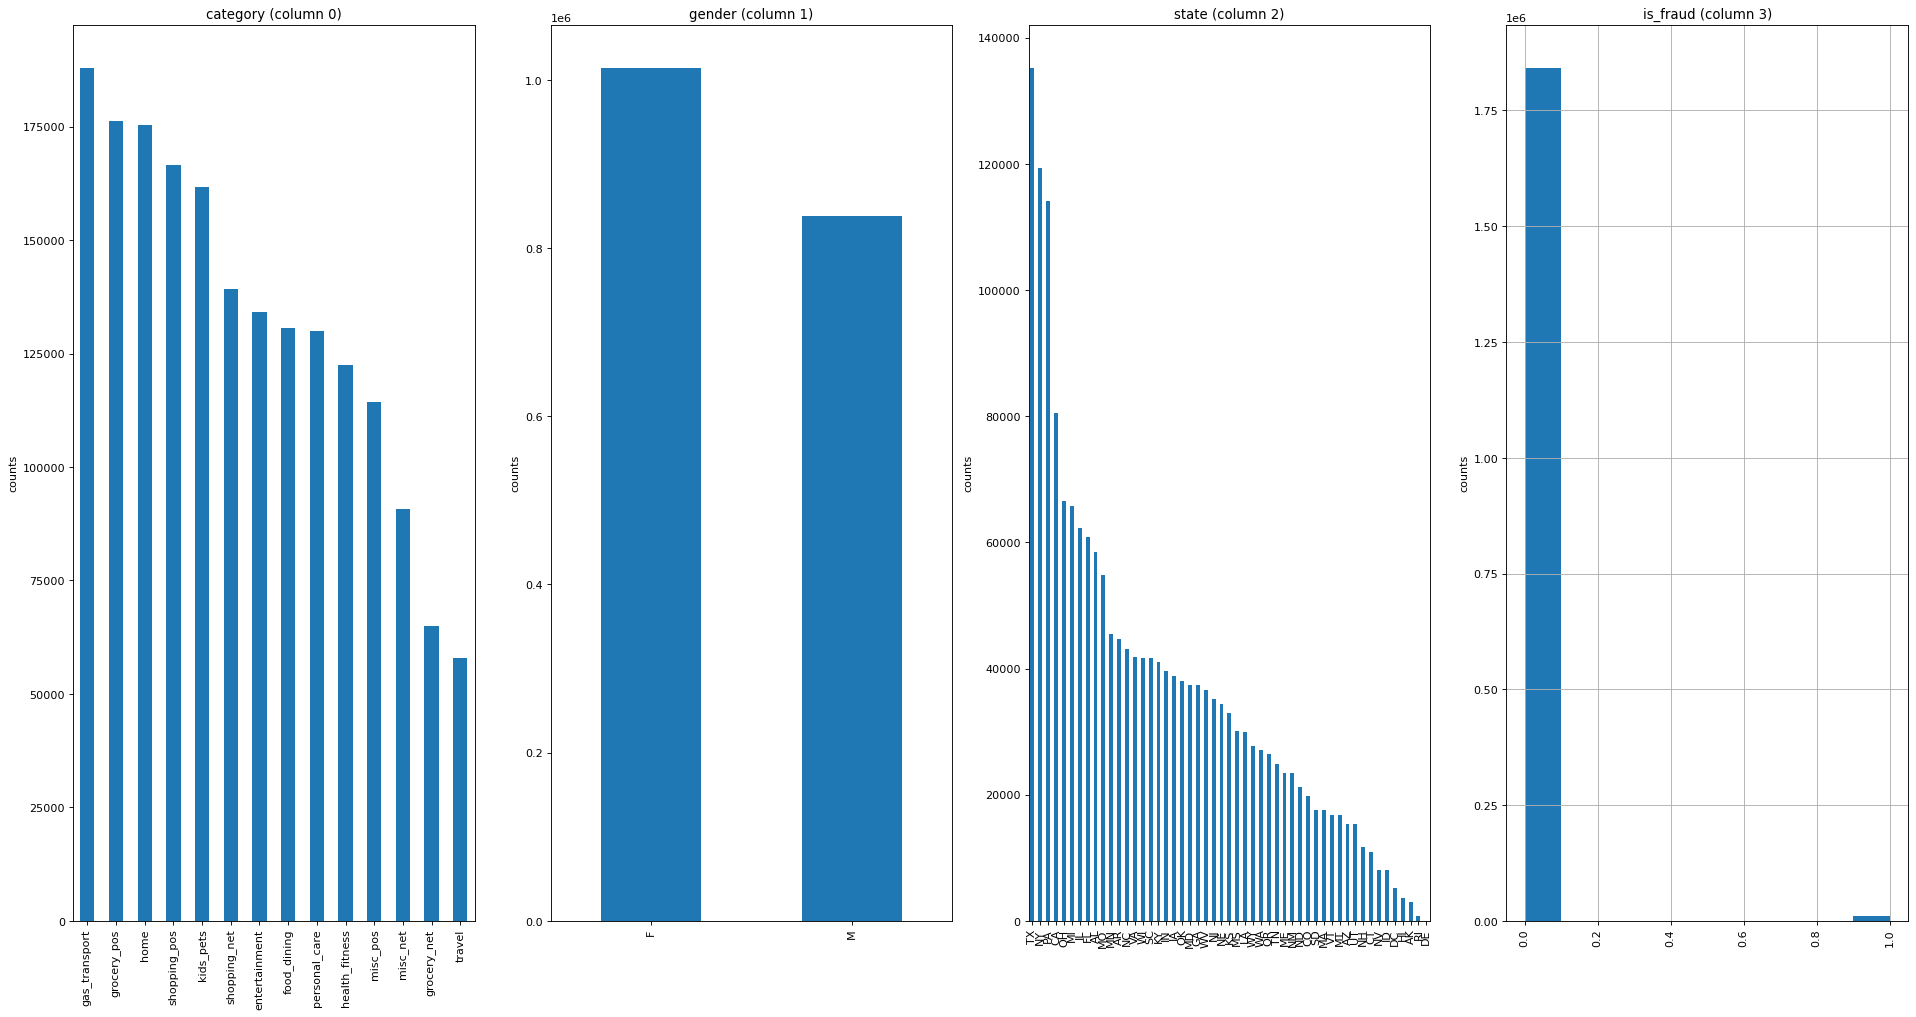

In [5]:
plotPerColumnDistribution(simulated_dataset, 13, 5)

In [6]:
# Convert categorical data to numerical
simulated_dataset = simulated_dataset.replace('F', 0)
simulated_dataset = simulated_dataset.replace('M', 1)

simulated_dataset['category'] = pd.Categorical(simulated_dataset['category'])
simulated_dataset['category'] = simulated_dataset['category'].cat.codes

simulated_dataset['state'] = pd.Categorical(simulated_dataset['state'])
simulated_dataset['state'] = simulated_dataset['state'].cat.codes
simulated_dataset.dataframeName = 'simulated'

In [7]:
# split dataset for further processing
fraud = simulated_dataset[simulated_dataset['is_fraud']==1]
normal = simulated_dataset[simulated_dataset['is_fraud']==0][:9651]

In [8]:
# data.columns
numeric_features = simulated_dataset.select_dtypes(include=[np.number])

numeric_features.columns

Index(['cc_num', 'category', 'amt', 'gender', 'state', 'zip', 'lat', 'long',
       'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

<AxesSubplot:title={'center':'Correlation of Numeric Features'}>

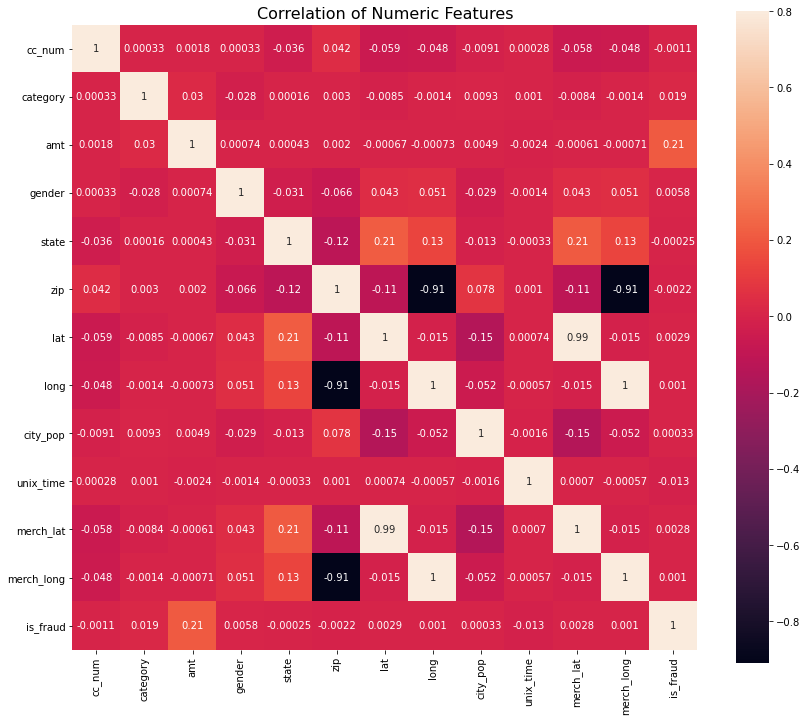

In [9]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

for column in numeric_features.columns:
    numeric_features[column] = rob_scaler.fit_transform(numeric_features[column].values.reshape(-1,1))


df = numeric_features.sample(frac=1)

normal_distributed_df = pd.concat([fraud, normal])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

    
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Numeric Features',y=1,size=16)
sns.heatmap(numeric_features.corr(),square = True,  vmax=0.8, annot=True)

Text(0.5, 1.0, 'is_fraud vs amt Positive Correlation')

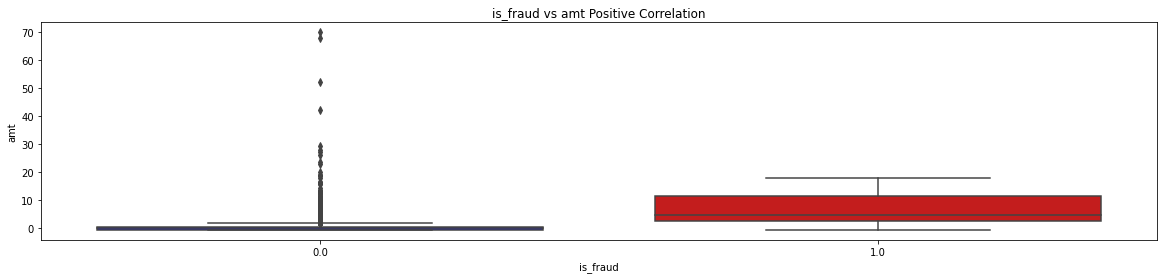

In [20]:
f, ax = plt.subplots(figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="is_fraud", y="amt", data=new_df, palette=["#0101DF", "#DF0101"], ax=ax)
ax.set_title('is_fraud vs amt Positive Correlation')

In [10]:
cols = simulated_dataset.corr().nlargest(5,'is_fraud')['is_fraud']
print(cols)

is_fraud    1.000000
amt         0.209308
category    0.019278
gender      0.005844
lat         0.002904
Name: is_fraud, dtype: float64


In [11]:
# See overall ststs
pd.concat([fraud.amt.describe(), normal.amt.describe()], axis=1)

,amt,amt
count,9651.000000,1.842743e+06
mean,530.661412,6.765128e+01
std,391.028873,1.535481e+02
min,1.060000,1.000000e+00
25%,240.075000,9.610000e+00
50%,390.000000,4.724000e+01
75%,902.365000,8.256000e+01
max,1376.040000,2.894890e+04


(0.0, 0.1)

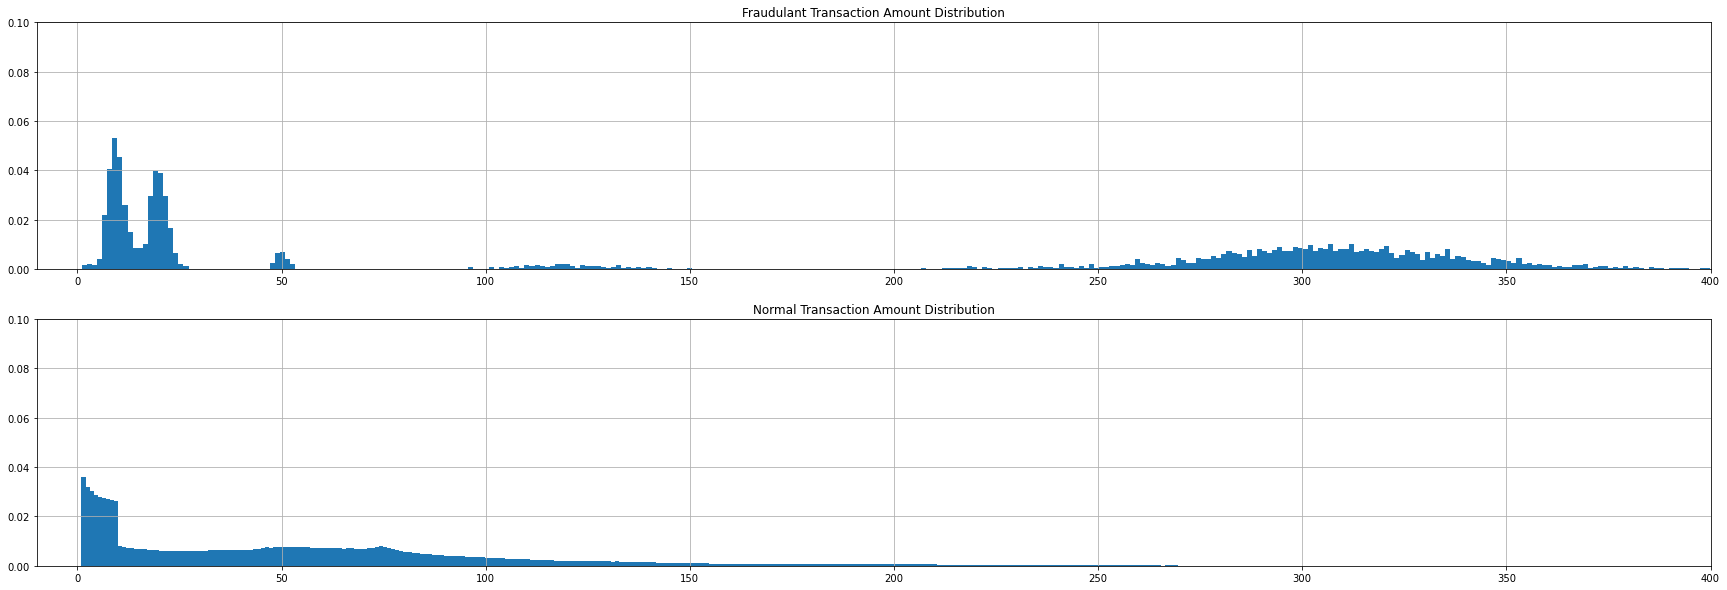

In [12]:
plt.figure(figsize=(30, 10))

print()
plt.subplot(2, 1, 1)
subfraud = fraud[fraud.amt<500]
subfraud.amt.hist(bins=400,weights=np.ones(len(subfraud.amt)) / len(subfraud.amt))
plt.title("Fraudulant Transaction Amount Distribution")
plt.xlim([-10,400])
plt.ylim([0,0.1])

plt.subplot(2, 1, 2)
subnormal = normal[normal.amt<500]
subnormal.amt.hist(bins=500, weights=np.ones(len(subnormal.amt)) / len(subnormal.amt))
plt.title("Normal Transaction Amount Distribution")
plt.xlim([-10,400])
plt.ylim([0,0.1])

(0.0, 0.15)

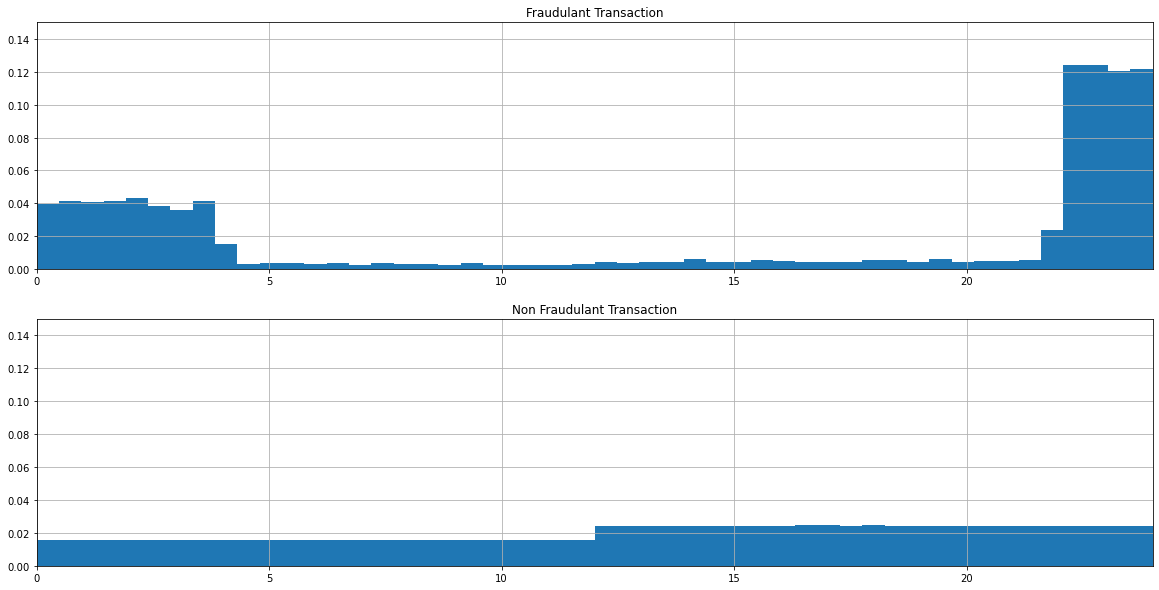

In [13]:
# plot hist 
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
fraud_24time = fraud.copy()
fraud_24time.unix_time = fraud_24time.unix_time % 86400 #(86400s per 24h)
fraud_24time.unix_time /= (86400/24)
fraud_24time.unix_time.hist(bins=50,weights=np.ones(len(fraud_24time)) / len(fraud_24time))
plt.title("Fraudulant Transaction")
plt.xlim([0,24])
plt.ylim([0,0.15])
plt.xlabel("")

plt.subplot(2, 1, 2)
normal_24time = normal.copy()
normal_24time.unix_time  = normal_24time.unix_time  % 86400 #(86400s per 24h)
normal_24time.unix_time /= (86400/24)
normal_24time.unix_time.hist(bins=50, weights=np.ones(len(normal_24time)) / len(normal_24time))
plt.title("Non Fraudulant Transaction")
plt.xlim([0,24])
plt.ylim([0,0.15])

In [14]:
simulated_c_test = pd.read_csv("fraudTest.csv")
simulated_c_train = pd.read_csv("fraudTrain.csv")
simulated_cluster = pd.concat([simulated_c_train, simulated_c_test])

simulated_cluster['unix_time'] = simulated_cluster['unix_time'].apply(lambda x: x % 86400)
simulated_cluster['unix_time'] = simulated_cluster['unix_time'].apply(lambda x: int((24 * x) / 86400))

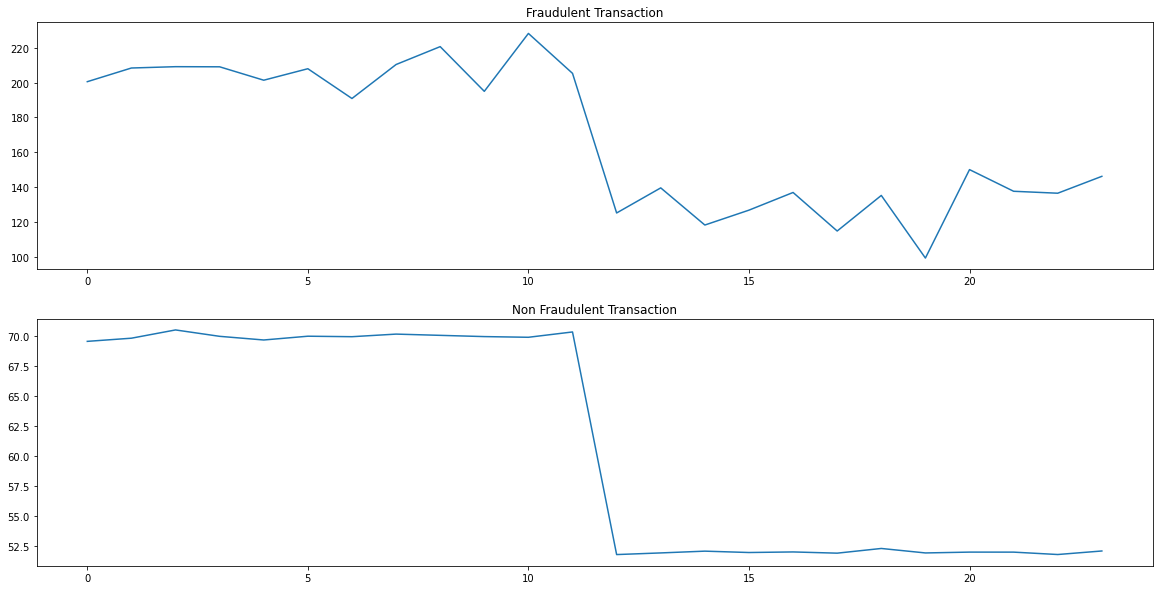

In [15]:
fraud_cluster = simulated_cluster[simulated_cluster['is_fraud'] == 1]
normal_cluster = simulated_cluster[simulated_cluster['is_fraud'] == 0]

fraud_cluster = fraud_cluster[fraud_cluster['amt'] < 500]
normal_cluster = normal_cluster[normal_cluster['amt'] < 500]

times = [t for t in range(24)]
fraud_averages = [fraud_cluster[fraud_cluster['unix_time'] == t]['amt'].mean() for t in range(24)]
normal_averages = [normal_cluster[normal_cluster['unix_time'] == t]['amt'].mean() for t in range(24)]


fig, ([ax1, ax2]) = plt.subplots(nrows=2, figsize=(20, 10))

ax1.plot(times, fraud_averages)
ax1.set_title("Fraudulent Transaction")
ax2.plot(times, normal_averages)
ax2.set_title("Non Fraudulent Transaction")
plt.show()

In [16]:
numerics = ['float64', 'int64', 'int8']
numeric_columns = simulated_dataset.select_dtypes(include=numerics)
numeric_columns.head()

,cc_num,category,amt,gender,state,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,8,4.97,0,27,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,630423337322,4,107.23,0,47,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,38859492057661,0,220.11,1,13,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3534093764340240,2,45.00,1,26,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,375534208663984,9,41.96,1,45,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0


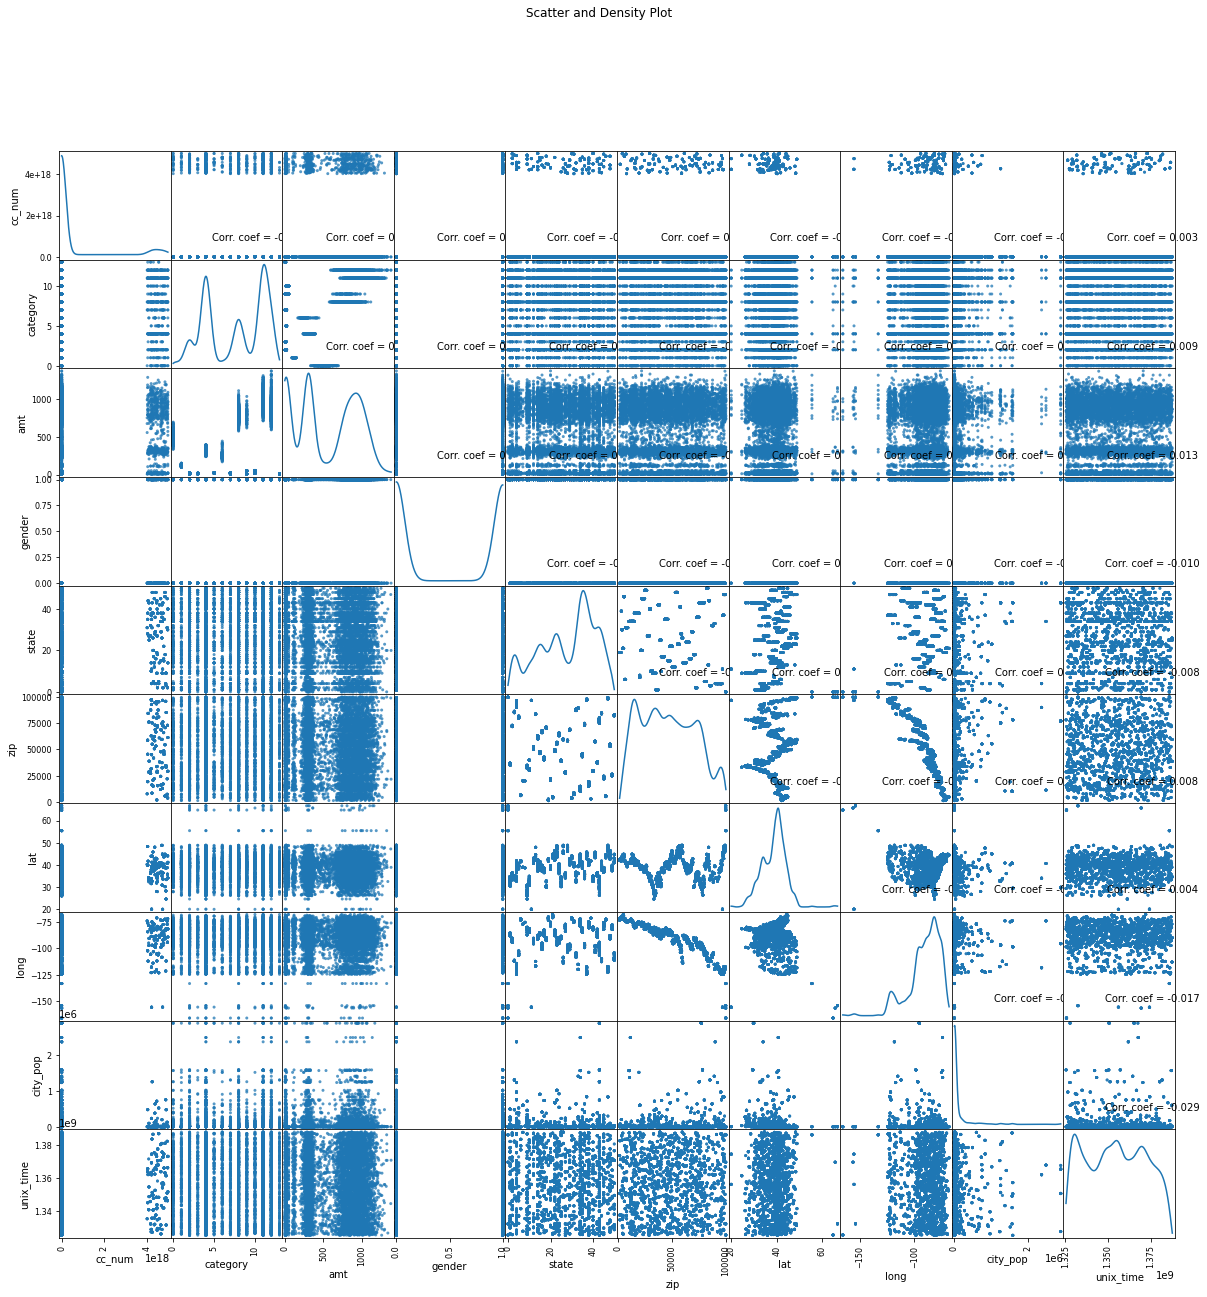

In [17]:
plotSize=20
textSize=10
df = numeric_columns[numeric_columns['is_fraud'] == 1]
# Remove rows and columns that would lead to df being singular
df = df.dropna('columns')
df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
columnNames = list(df)
if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
    columnNames = columnNames[:10]
df = df[columnNames]
ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
corrs = df.corr().values
for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
    ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
plt.suptitle('Scatter and Density Plot')
plt.show()

In [18]:
plotSize=20
textSize=10
df = numeric_columns[numeric_columns['is_fraud'] == 0]
# Remove rows and columns that would lead to df being singular
df = df.dropna('columns')
df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
columnNames = list(df)
if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
    columnNames = columnNames[:10]
df = df[columnNames]
ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
corrs = df.corr().values
for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
    ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
plt.suptitle('Scatter and Density Plot')
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000018854812040> (for post_execute):


KeyboardInterrupt: 